# Семинар № 9. Библиотека pandas (часть 3)

# Задача
В рамках выполнения домашнего проекта вам придётся продолжить анализ выбранного набора данных.
На предыдущих семинарах мы обсуждали, как можно провести предварительный анализ, выполнить предобработку и сформулировать простые гипотезы.

Теперь настало время приступить к следующему этапу - построению сложных гипотез.

Снова рассмотрим набор данных про пассажиров Титаника.

Ваша задача - построить сложные гипотезы о зависимостях разных признаков, а также доказать или опровергнуть их.

### Решение

Сначала загрузим файл с данными и посмотрим на него:

In [ ]:
from google.colab import output

In [ ]:
!wget -O "titanic_corrupted.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/titanic_corrupted.csv"
output.clear()

In [ ]:
import pandas as pd

Считываем наборы данных в специальный объект df - датафрейм:

In [ ]:
df = pd.read_csv('titanic_corrupted.csv')

Предобработаем названия колонок:

In [ ]:
# Предобрабатываем названия колонок
def column_name_preprocess(col_name):
    for char in ['_', ';', '-', ' ', '.', ':']:
        col_name = col_name.replace(char, '')
    return col_name

column_names = df.columns
df.columns = [column_name_preprocess(col_name).title() for col_name in column_names]
print(df.columns)

Index(['Passengerid', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Смотрим содержимое набора данных:

In [ ]:
df.head(10)

,Passengerid,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,Kelly; Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
1,893.0,3.0,Wilkes; Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S
2,894.0,NaN,Myles; Mr. Thomas Francis,NaN,NaN,0,0,240276,9.6875,NaN,Q
3,895.0,3.0,NaN,male,27.0,0,0,315154,8.6625,NaN,S
4,896.0,3.0,Hirvonen; Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S
5,897.0,3.0,Svensson; Mr. Johan Cervin,male,14.0,0,0,7538,9.2250,NaN,S
6,898.0,3.0,Connolly; Miss. Kate,female,30.0,0,0,330972,7.6292,NaN,Q
7,899.0,2.0,NaN,male,26.0,1,1,248738,NaN,NaN,S
8,900.0,3.0,Abrahim; Mrs. Joseph (Sophie Halaut Easu),female,18.0,0,0,2657,7.2292,NaN,C
9,NaN,3.0,Davies; Mr. John Samuel,male,21.0,2,0,A/4 48871,24.1500,NaN,S


Теперь вспомним, как можно добавить новый признак - количество родственников на борту пассажира?

In [ ]:
df['Relatives'] = df.apply(lambda row: row['Sibsp'] + row['Parch'], axis=1)

Поскольку колонка Relatives - это просто сумма, её можно добавить наболее простым способом:

In [ ]:
df['Relatives'] = df['Sibsp'] + df['Parch']
print(df['Relatives'])

0      0
1      1
2      0
3      0
4      2
      ..
413    0
414    0
415    0
416    0
417    2
Name: Relatives, Length: 418, dtype: int64


## Проверка сложных гипотез.

До этого мы проверяли гипотезы только по отдельным признакам.

Но в реальной жизни нужно строить более сложные гипотезы, в которых учавствуют уже несколько признаков.

Самый простой пример такой гипотезы - гипотеза о влиянии одного признака на другой.

Она формулируется следующийм образом: "Признак A влияет на признак B."

Далее попытаемся понять, как следует строить такие гипотезы.

### Выбор целевых переменных

Прежде чем строить гипотезы о влиянии одного признака на другой, надо понять, влияние на какие признаки мы хотим изучить.

Т.е. нужно выбрать так называемые целевые переменные (признаки) - это те признаки, на которые как-то могут влиять другие признаки.

Обычно такой признак один. Но может быть и несколько.

В нашем наборе данных логично в качестве целевого признака выбрать **Fare** (цену билета). Потому что было бы интересно посмотреть, какие пассажиры покупают дорогие билеты, а какие - дешёвые.

### Отбор потенциально влияющих на целевой признаков. Построение гипотез

Теперь нужно понять, какие признаки могут влиять на целевую переменную. Отобранные признаки и будут определять, какие гипотезы мы будем ставить.


Логично предположить, что на цену билета могут влиять следующие признаки: **Pclass, Sex, Embarked, Age, Relatives**.

Признак **Passengerid** - это уникальный номер пассажира. Обычно такие значения не влияют на целевую переменную.
**Name, Ticket, Cabin** - строковые признаки, обозначающие имя, номер билета и название каюты. Они не несут никакой полезной смысловой информации.
Признаки **Sibsp** и **Parch** - не рассматриваются как влияющие, поскольку они уже были учтены в признаке Relatives, который мы использовали, как влияющий.

Попробуем для каждого влияющего признака построить гипотезу о влиянии его на целевой признак. А затем докажем или опровергнем построенную гипотезу.

### Гипотеза 1. Признак Pclass влияет на признак Fare

На самом деле, мы ранее уже доказали эту гипотезу, когда построили гистограммы распределения Fare для разных Pclass:

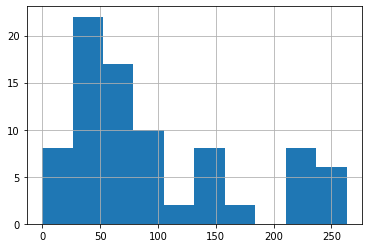

In [ ]:
# Гистограмма для Fare при Pclass==1

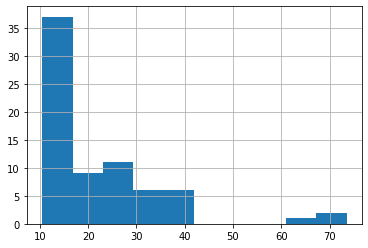

In [ ]:
# Гистограмма для Fare при Pclass==2

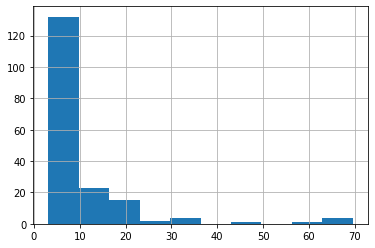

In [ ]:
# Гистограмма для Fare при Pclass==3 и удалением выбросов

Вспомните, почему мы отбросили значения Fare<100?

*Потому что эти значения - выбросы, которые появились, когда мы заполняли пропуски в колонке Pclass*.

Дополнительно можно так же построить описательные статистики для колонки Fare и различных классов пассажиров.

In [ ]:
df.query('Pclass==1')['Fare'].describe()

count     83.000000
mean      94.660745
std       74.385037
min        0.000000
25%       31.681250
50%       71.283300
75%      135.066650
max      263.000000
Name: Fare, dtype: float64

In [ ]:
df.query('Pclass==2')['Fare'].describe()

count    72.000000
mean     21.990565
std      13.381994
min      10.500000
25%      13.000000
50%      15.875000
75%      26.000000
max      73.500000
Name: Fare, dtype: float64

In [ ]:
df.query('Pclass==3').query('Fare<100')['Fare'].describe()

count    182.000000
mean      12.245765
std       11.047959
min        3.170800
25%        7.750000
50%        7.895800
75%       13.775000
max       69.550000
Name: Fare, dtype: float64

Мы видим, что основные статистические характеристики сильно разнятся у разных классов.

Отсюда, можно сделать вывод, что наша гипотеза подтверждена. Действительно класс определяет стоимость билета.

### Гипотеза 2. Признак Sex влияет на признак Fare

Sex - также категориальный признак. Поэтому подтверждение данной гипотезы аналогично гипотезе 1:

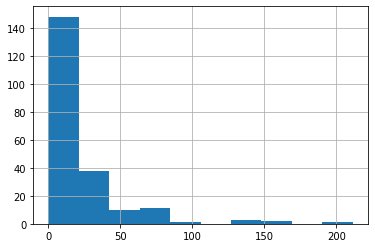

In [ ]:
# Гистограмма для Fare при Sex=='male'

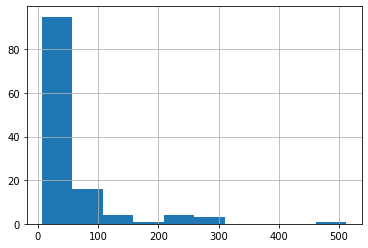

In [ ]:
# Гистограмма для Fare при Sex=='female'

Теперь давайте построим статистики:

In [ ]:
# Вставьте свой код здесь

count    214.000000
mean      22.598344
std       29.219834
min        0.000000
25%        7.854200
50%       11.104150
75%       26.000000
max      211.500000
Name: Fare, dtype: float64

In [ ]:
# Вставьте свой код здесь

count    124.000000
mean      47.368046
std       70.868229
min        6.950000
25%        8.626050
50%       21.512500
75%       53.685425
max      512.329200
Name: Fare, dtype: float64

Мы видим, что цены билетов у женщин на самом деле в среднем больше, чем у мужчин. Интересно понять, почему так произошло =)

Гипотеза 2 так же подтверждена.

### Гипотеза 3. Признак Embarked влияет на признак Fare

Embarked - также категориальный признак. Давайте снова построим гистограммы:

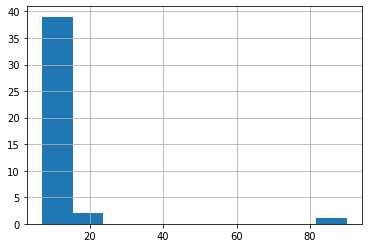

In [ ]:
df.query("Embarked=='Q'")['Fare'].hist()

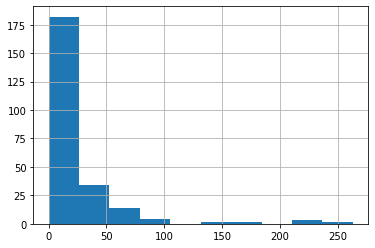

In [ ]:
df.query("Embarked=='S'")['Fare'].hist()

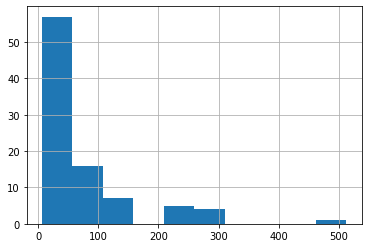

In [ ]:
df.query("Embarked=='C'")['Fare'].hist()

Мы видим, что те пассажиры, что садились в первом порту, отдавали меньше всего денег за билет. Во втором порту отдавали уже больше денег. И самые дорогие билеты были проданы в третьем порту.

Гипотеза доказана.

### Гипотеза 4. Признак Age влияет на признак Fare

Здесь уже мы видим, что оба признака - числовые.

Какие графики строить в этом случае?

Мы могли бы построить гистограммы для разных групп возрастов. Но в этом случае получится очень много графиков, и они будут не очень информативными. 

В случае, когда оба признака числовые - можно строить точечные графики:

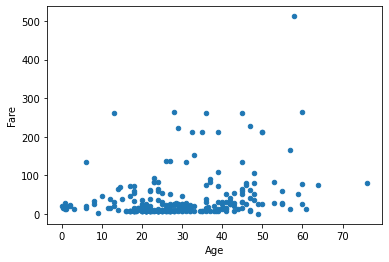

In [ ]:
df.plot.scatter(x='Age', y='Fare')

На самом деле, мы видим, что дорогие билеты начинают покупать только для пассажиров после 25 лет.

Возможно, это связано с дополнительными скидками на билеты для молодёжи.

Поэтому, скорее всего, влияние возраста на цену билета есть.

Тогда оценим уровень этого влияния. 

Для этого можно вычислить коррелляцию:

In [ ]:
df['Age'].corr(df['Fare'])

0.29393472849821073

Мы видим, что коэффициент корелляции не очень большой. Поэтому можно считать, что какое-то влияние есть, но оно слабое.
Т.е. гипотеза опровергнута.

### Гипотеза 5. Признак Relatives влияет на признак Fare

Этот признак можно также рассматривать и как категориальный, и как числовой. Поэтому проверять гипотезу можно путём построения 10 гистограмм, либо же при помощи вычисления коэффициента корелляции.

Давайте выберем второй способ:

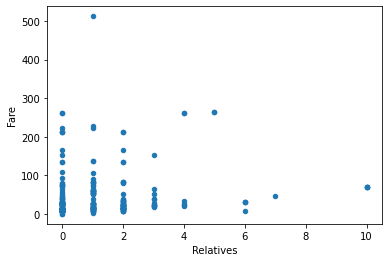

In [ ]:
# Строим точечный график

Мы не видим сильной связи между двумя признаками на графиках.

Давайте посчитаем коэффициент корелляции:

In [ ]:
# Вычисляем коэффициент корелляции

0.23158173581935934

Как мы видим, и здесь коэффициент корелляции не такой большой.

Зависимости нет.

Гипотеза отвергнута.

# Задача


Составим алгоритм построения сложных гипотез для выбранных вами наборов данных.

1. Если не была выполнена предобработка - возвращайтесь к позапрошлому семинару и выполняйте её.
2. Если не были построены простые гипотезы - возвращайтесь к прошлому семинару и выполняйте построение простых гипотез.
3. Определите, какие признаки можно считать целевыми.
4. Для каждого целевого признака отберите признаки, которые могут влиять на него. Постройте соответствующие гипотезы.
5. Подтвердите или опровергните построенные гипотезы.